# IA Assignment 2 - Supervised Learning

## AirLine Delays

> Airlines Dataset Inspired in the regression dataset from Elena Ikonomovska. The task is to predict whether a given flight will be delayed, given the information of the scheduled departure.

### Imports

In [80]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


### Loading data

In [81]:
df = pd.read_csv("Data/airlines_delay.csv")

In [82]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


### Exploratory Data Analysis and Data Visualization

In [83]:
df.dtypes

Flight         float64
Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object

In [84]:
df.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


Only shows values for numerical colums, this means that information regarding the columns **Airline**, **AirportFrom** and  **AirportTo** is not being displayed.

In [85]:
df.isna().any()

Flight         False
Time           False
Length         False
Airline        False
AirportFrom    False
AirportTo      False
DayOfWeek      False
Class          False
dtype: bool

There is no **Null** or **NA** values

In [86]:
df.nunique()

Flight         6585
Time           1131
Length          426
Airline          18
AirportFrom     293
AirportTo       293
DayOfWeek         7
Class             2
dtype: int64

In [87]:
if set(df['AirportFrom'].unique()) == set(df['AirportFrom'].unique()):
    print("Same list of Airports")
else:
    print("Different List of Airports")

Same list of Airports


Where is some information this gives us:
- The flight numbers can be repeated, even though they are technically an ID
- There are a total of 18 airlines
- The list of airports of departure and the list of airports of arrival are the same

To find outliers, we will use IRQ(Inter Quartile Range) since it works for normal and non-normla distributions.

In [88]:
def find_outliers(df):
  outlier_percents = {}
  outlier_rows = pd.DataFrame()
  non_object_cols = df.select_dtypes(exclude=['object'])
  for column in non_object_cols:
    q3, q1 = np.percentile(df[column], [75, 25]) 
    iqr = q3 - q1
    upper = q3 + (1.5 * iqr)
    lower = q1 - (1.5 * iqr)
    outliers_aux = df[(df[column] > upper) | (df[column] < lower)]
    outliers = outliers_aux[column]
    if not outliers.empty:
      outlier_rows = pd.concat([outlier_rows, outliers_aux],axis=0)
    outlier_percentage = len(outliers) / len(df[column]) * 100
    outlier_percents[column] = outlier_percentage
    outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
  return outlier_dataframe, outlier_rows

outlier_df, outlier_rows = find_outliers(df)
print(outlier_df)
print(outlier_rows)


           Outlier_percentage
Flight               0.000000
Time                 0.000000
Length               4.755442
DayOfWeek            0.000000
Class                0.000000
        Flight    Time  Length Airline AirportFrom AirportTo  DayOfWeek  Class
3         31.0  1410.0   344.0      US         OGG       PHX          6      0
40       593.0  1071.0   289.0      UA         BOS       DEN          5      0
81      2364.0   845.0   325.0      DL         HNL       LAX          2      0
125      935.0   980.0   359.0      UA         LAX       HNL          4      0
157        1.0   595.0   549.0      UA         ORD       HNL          3      0
...        ...     ...     ...     ...         ...       ...        ...    ...
539320   209.0   885.0   351.0      UA         IAD       LAX          3      1
539342  1253.0  1255.0   355.0      AA         MIA       LAX          1      1
539359   636.0  1273.0   320.0      B6         SFO       BOS          4      1
539369   852.0   865.0   337.0

Only the column lenght as outliers (around 4.75%)

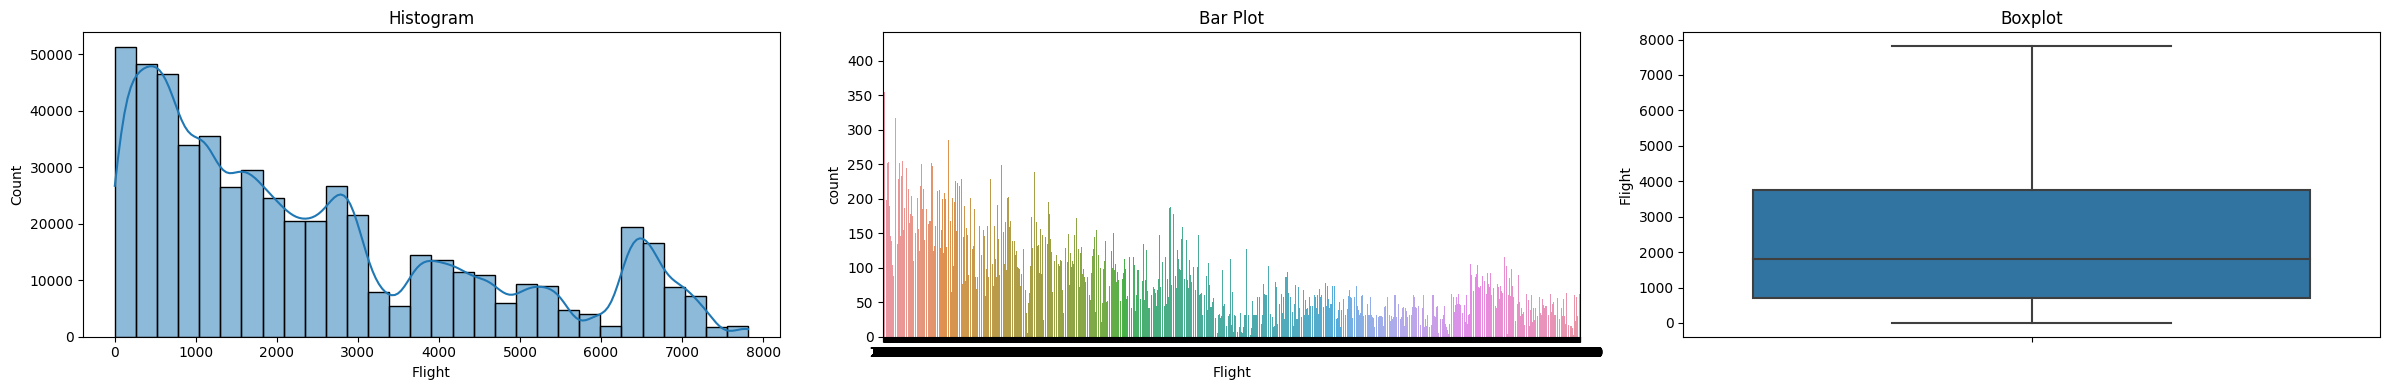

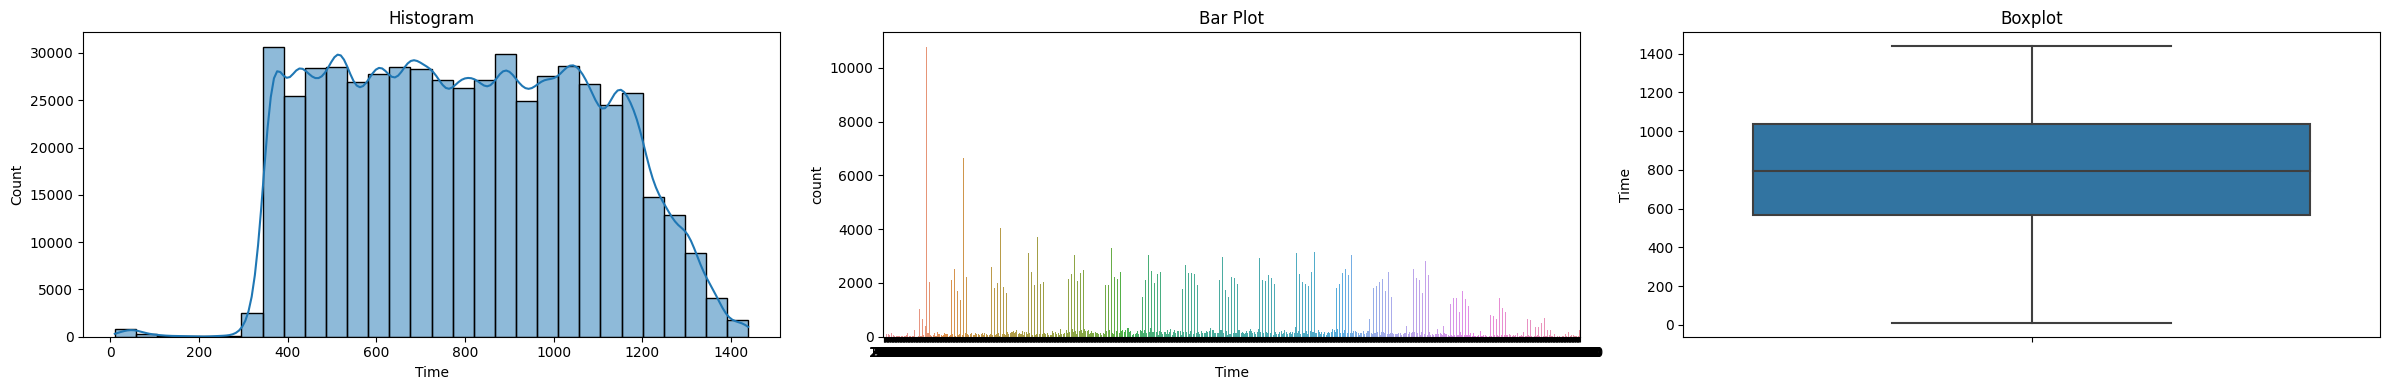

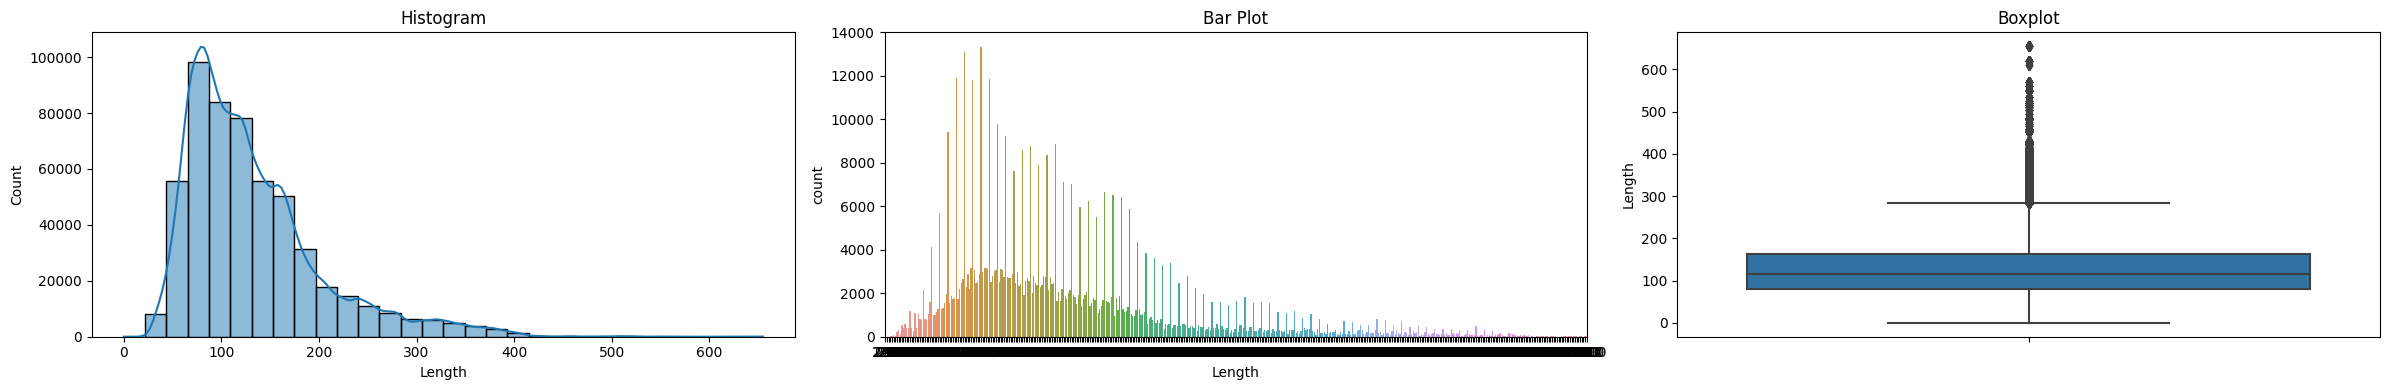

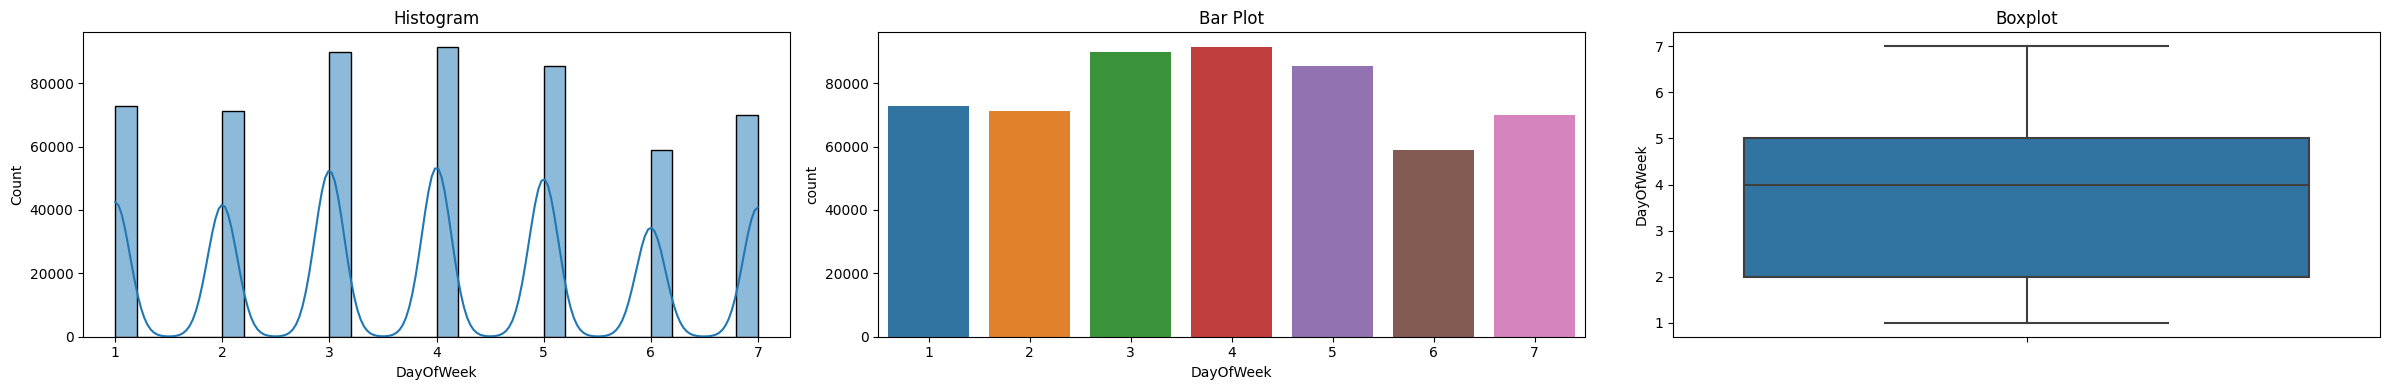

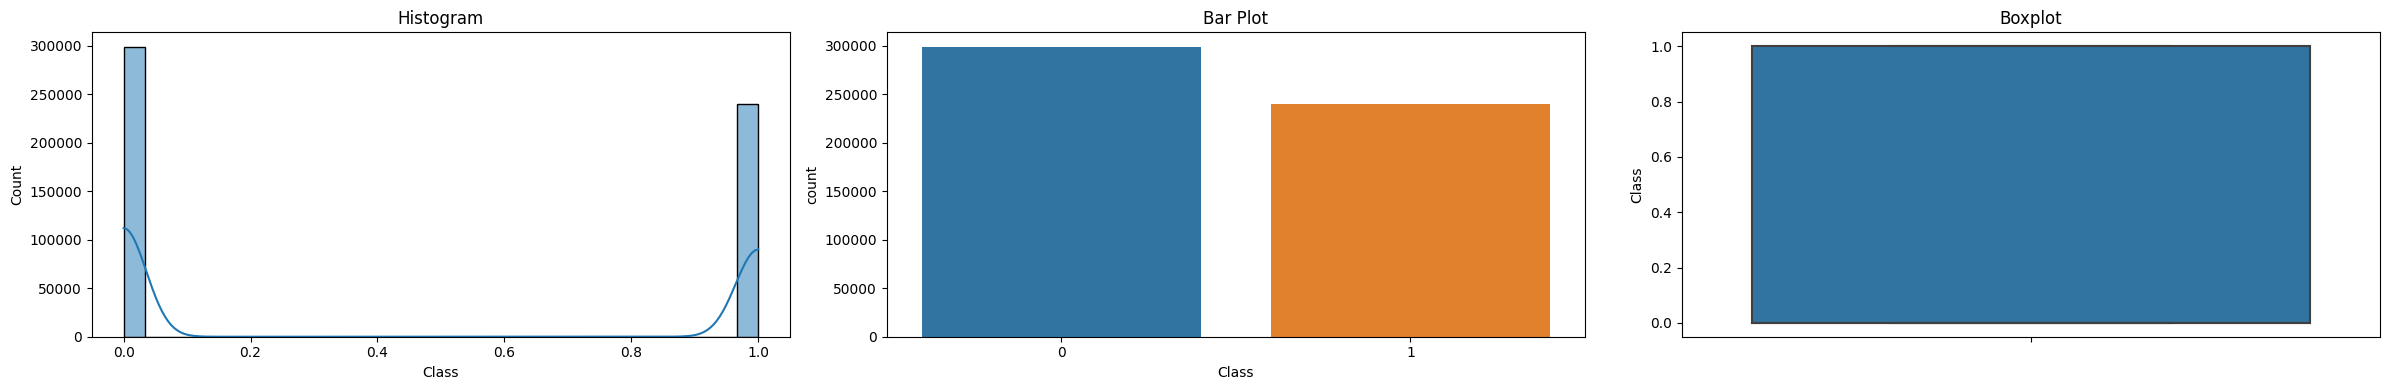

In [89]:
def plots(df, variable):
    if df[variable].dtype != object:
        # define figure size
        fig, ax = plt.subplots(1, 3, figsize=(24, 4))

        # histogram
        sb.histplot(df[variable], bins=30, kde=True, ax=ax[0])
        ax[0].set_title('Histogram')
        
        # bar plot
        sb.countplot(x=df[variable], ax=ax[1])
        ax[1].set_title('Bar Plot')

        # boxplot
        sb.boxplot(y=df[variable], ax=ax[2])
        ax[2].set_title('Boxplot')

        plt.tight_layout()
        plt.show()

for i in df.columns:
    plots(df, i)

[Text(0.5, 1.0, 'Proportion of On-time vs Delayed Flights by Airline')]

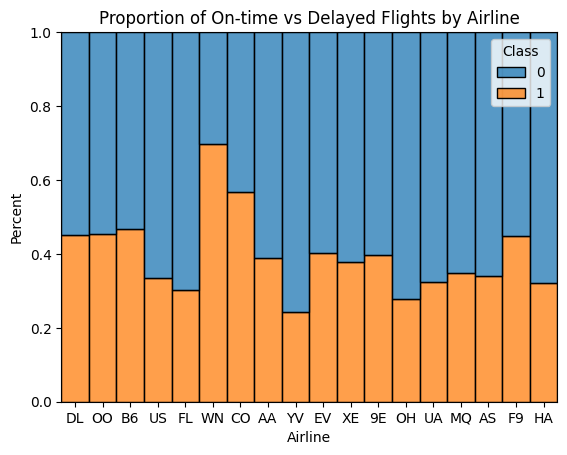

In [90]:
sb.histplot(data=df, x="Airline",
             stat="percent",
             multiple="fill",
             hue="Class").set(title='Proportion of On-time vs Delayed Flights by Airline')

As we can see in the graph, the airlines with a bigger proportion of delayed flights per flighs is the ailines **WN** and **CO**

<Axes: xlabel='Time', ylabel='Percent'>

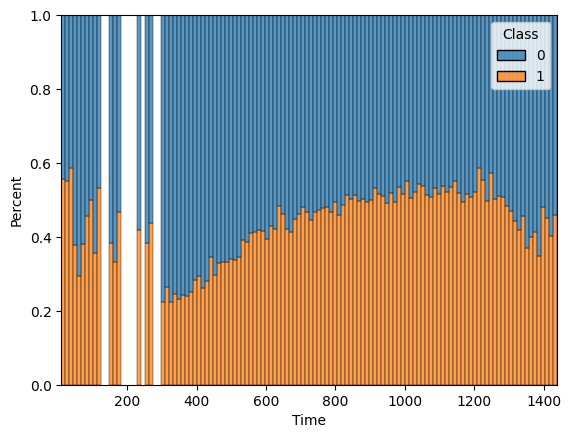

In [91]:
sb.histplot(data=df, x="Time", stat="percent", multiple="fill", hue="Class")

In this graph, we can see that most flights are on time during the morning, and it gets worse throughout the day

We also need to encode the categorical values to perform a correlation matrix

In [92]:
from sklearn.preprocessing import LabelEncoder
df['AirportTo']=LabelEncoder().fit_transform(df['AirportTo'])
df['AirportFrom']=LabelEncoder().fit_transform(df['AirportFrom'])
df['Airline']=LabelEncoder().fit_transform(df['Airline'])


In [93]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,5,16,129,1,0
1,6948.0,360.0,146.0,12,65,208,4,0
2,1247.0,1170.0,143.0,3,35,60,3,0
3,31.0,1410.0,344.0,14,203,217,6,0
4,563.0,692.0,98.0,8,32,16,4,0


<Axes: >

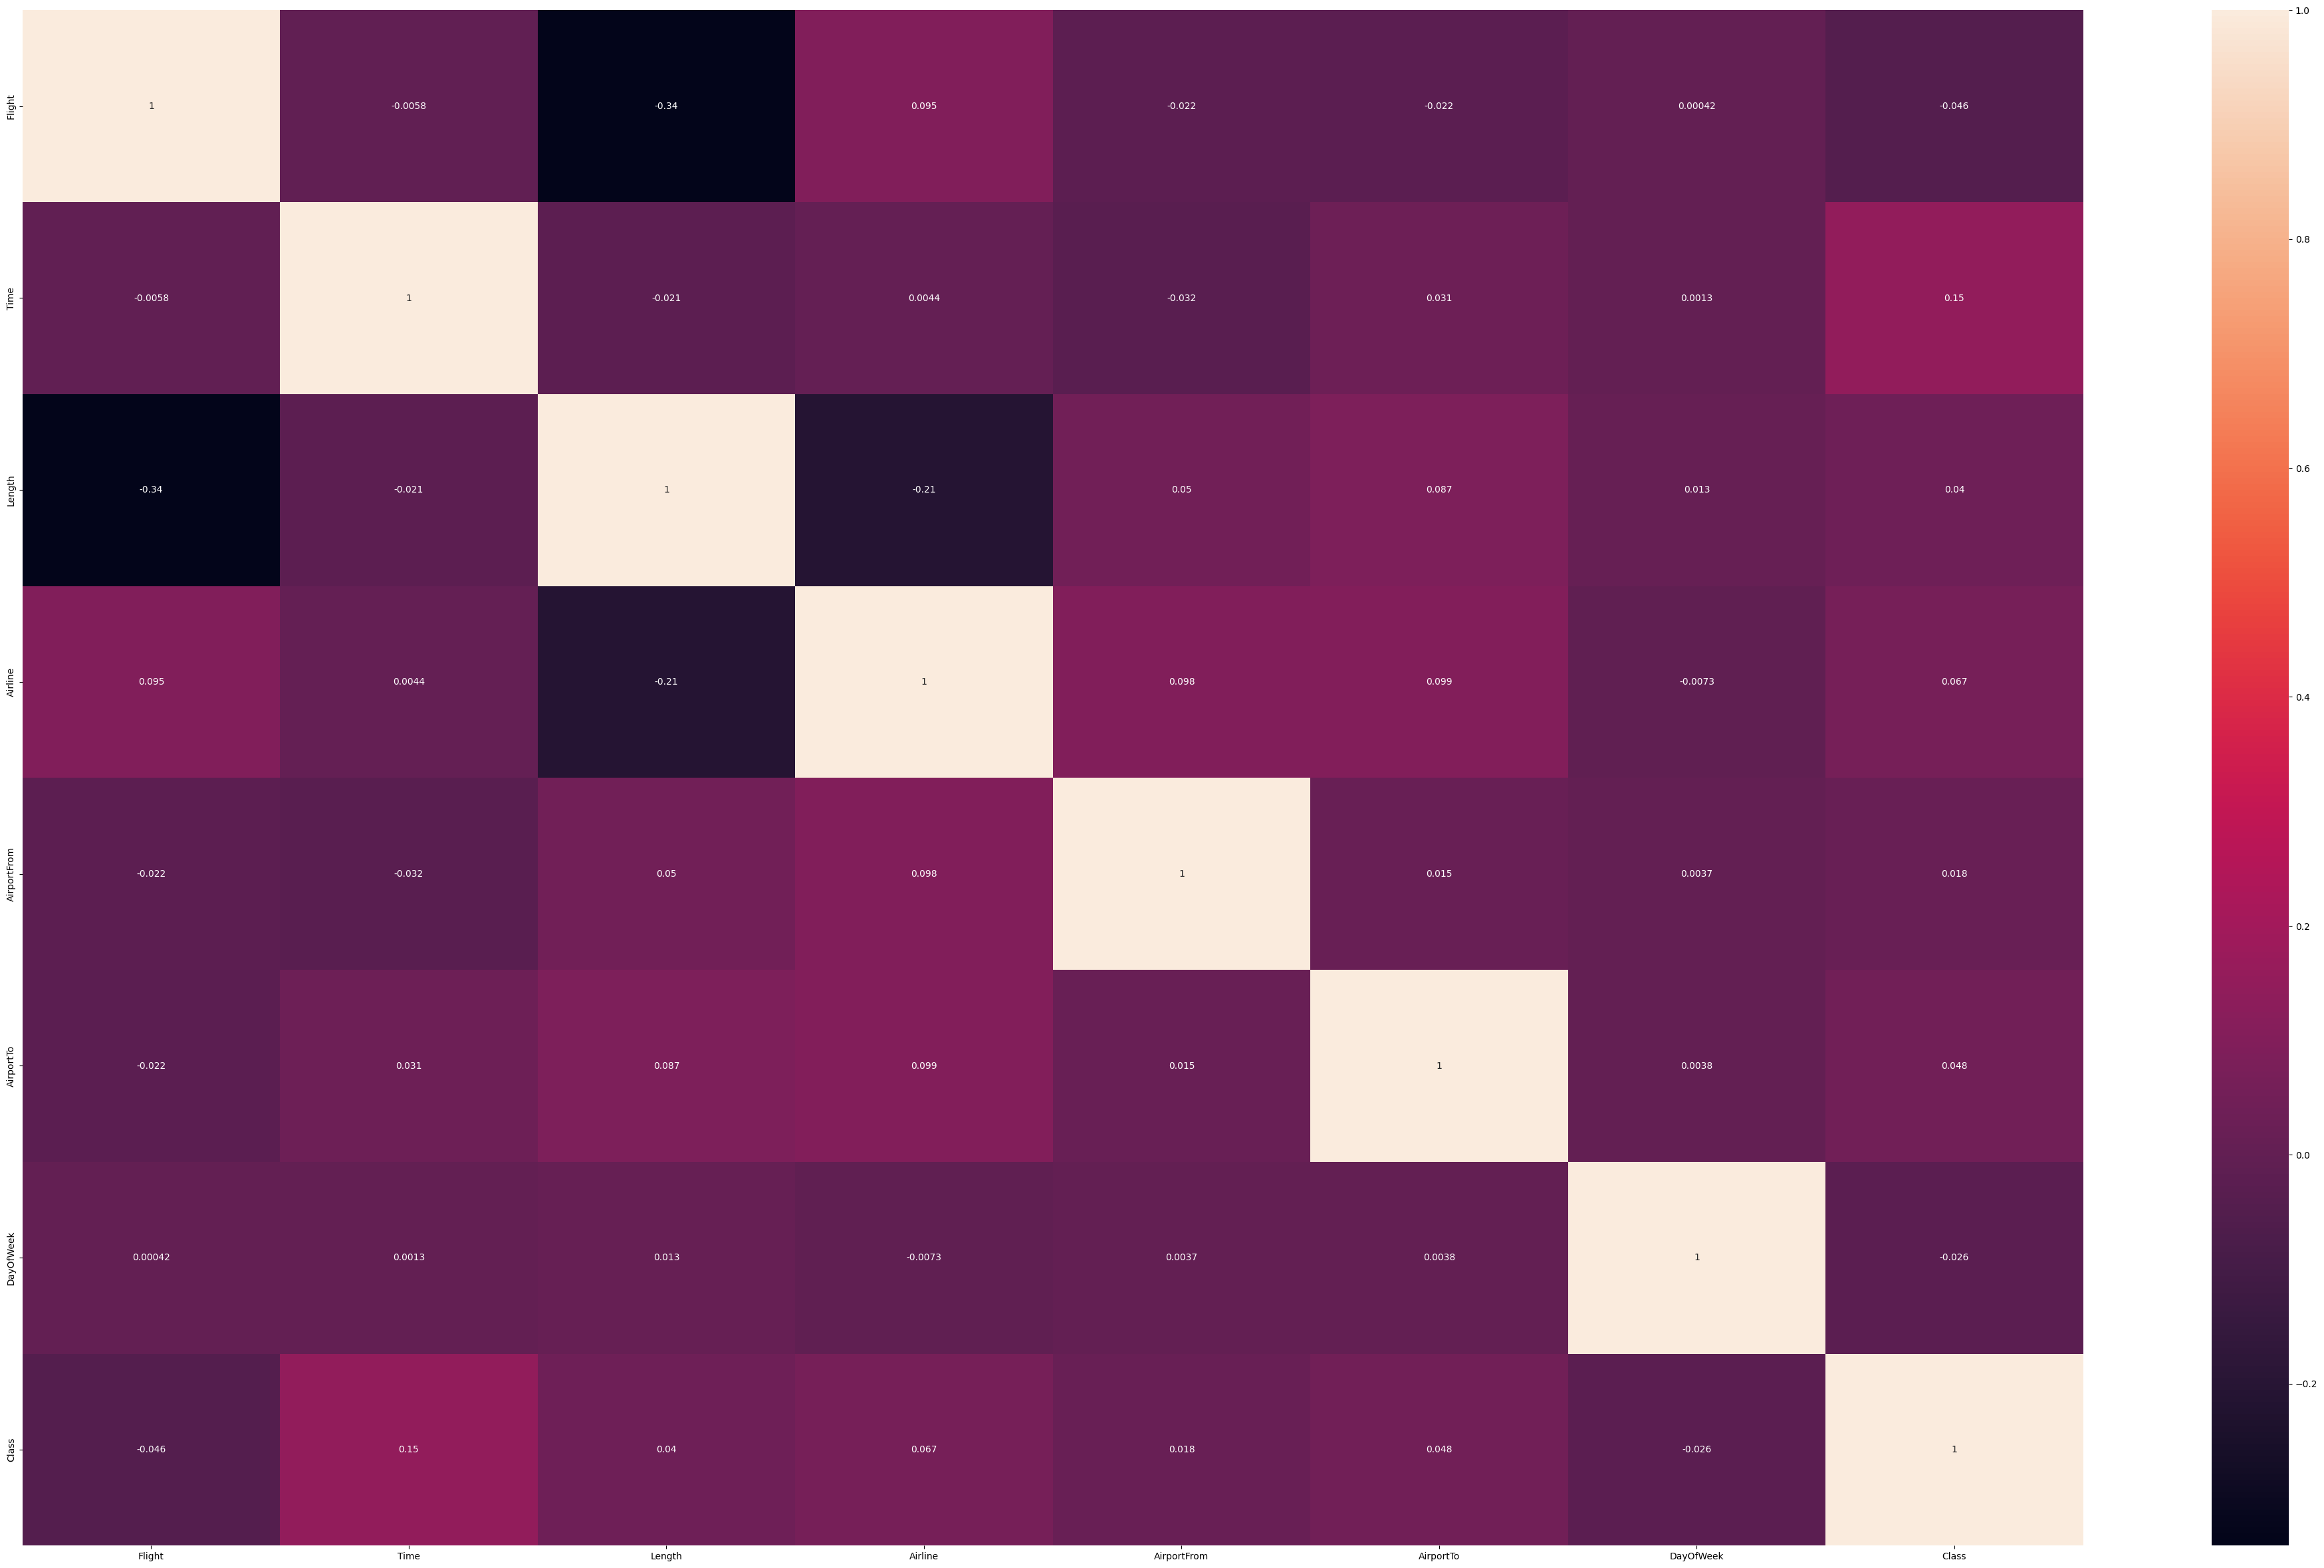

In [94]:
plt.figure(figsize=(50,30))
sb.heatmap(df.corr(),annot=True)